# The performance of amplitude modulation with noise. 
Jie Wang

Jan 3rd, 2023

1. Build an `AM system` using Python 
2.  Please simulate the `envelop modulation` by a sinusoidal wave with a modulation index
of 0.3, include AWGN noise, and then envelop-detect the message. 

Choose a suitable baseband signal for AM communications. Plot its time domain and frequency domain forms.
- (1) Plot the envelop modulated signal (with and without noise).
- (2) Plot its spectrum (with and without noise).
- (3) Plot the envelope-detected signal before low-pass filtering (with and without noise).
- (4) Estimate numerically the post-detection SNR.
- (5) Compare the post-detection SNR to theory for both low and high pre-detection SNR.



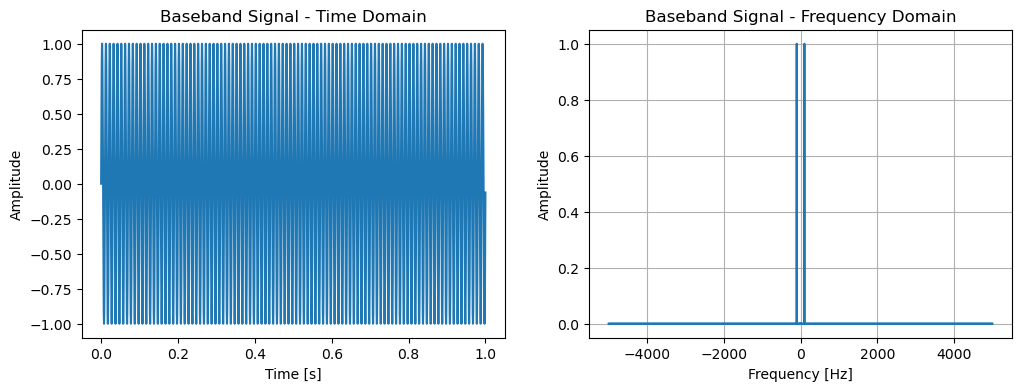

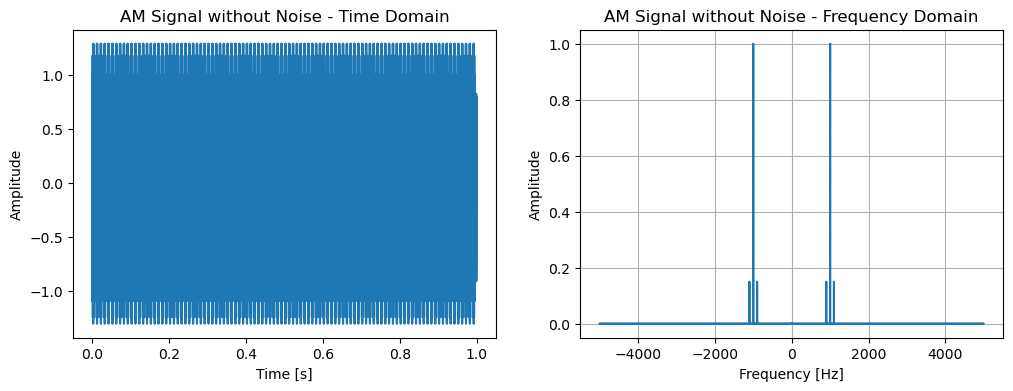

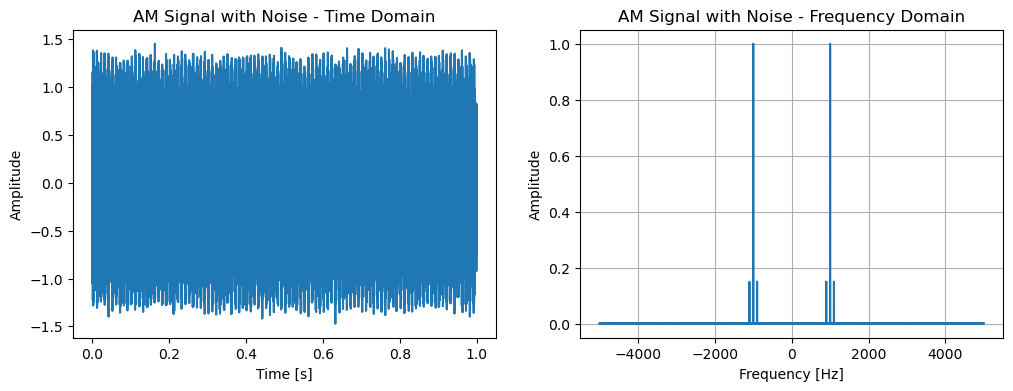

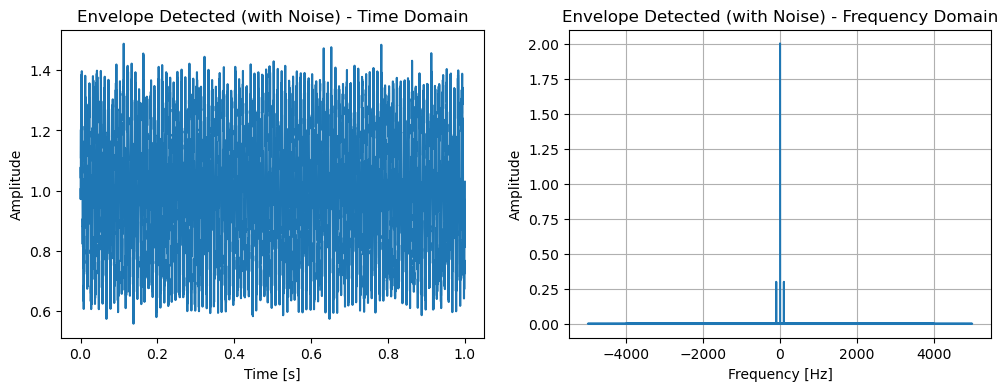

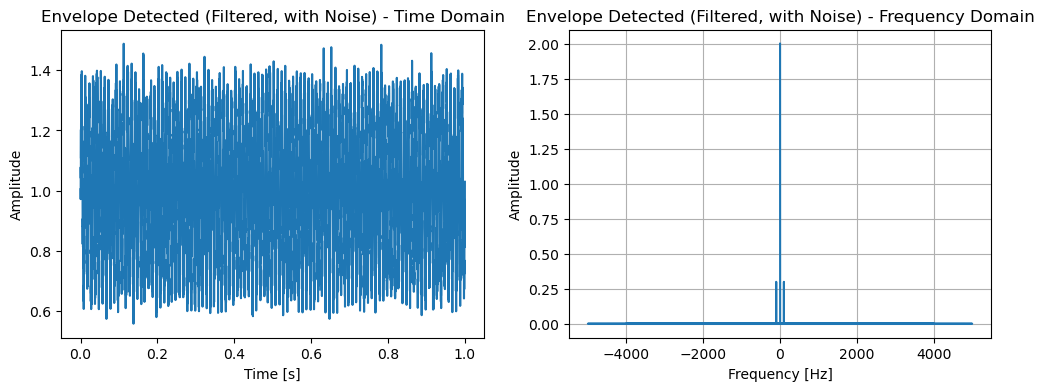

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, butter, lfilter
from scipy.fft import fft, fftfreq

# Constants
fs = 10000  # Sampling frequency
fc = 1000   # Carrier frequency
fm = 100    # Message frequency
mod_index = 0.3  # Modulation index
duration = 1  # Duration of the signal in seconds
t = np.arange(0, duration, 1/fs)  # Time vector

# Baseband signal (choosing a simple sinusoidal wave)
baseband = np.sin(2 * np.pi * fm * t)

# AM signal without noise
carrier = np.cos(2 * np.pi * fc * t)
am_signal = (1 + mod_index * baseband) * carrier

# Adding AWGN noise
noise_power = 0.003
noise = np.random.normal(0, np.sqrt(noise_power), size=len(t))




# Apply bandpass filter around the carrier frequency to simulate receiver filtering
def bandpass_filter(signal, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, signal)
    return y
# Filter noise around the carrier frequency to simulate realistic conditions
filtered_noise = bandpass_filter(noise, fc - fm, fc + fm, fs)

am_signal_noisy = am_signal + noise
# Envelope detection
analytic_signal = hilbert(am_signal_noisy)
envelope = np.abs(analytic_signal)


# Low-pass filter for envelope detection
def low_pass_filter(signal, cutoff=300, fs=fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = lfilter(b, a, signal)
    return y

# Filtered envelope
filtered_envelope = low_pass_filter(envelope)


filtered_envelope = (envelope)

# Function to plot time and frequency domain
def plot_signal(t, signal, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(t, signal)
    plt.title(f"{title} - Time Domain")
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')

    # Frequency domain
    yf = fft(signal)
    xf = fftfreq(len(t), 1 / fs)
    plt.subplot(1, 2, 2)
    plt.plot(xf, 2.0/len(t) * np.abs(yf))
    plt.title(f"{title} - Frequency Domain")
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

# Plotting the results
plot_signal(t, baseband, "Baseband Signal")
plot_signal(t, am_signal, "AM Signal without Noise")
plot_signal(t, am_signal_noisy, "AM Signal with Noise")
plot_signal(t, envelope, "Envelope Detected (with Noise)")
plot_signal(t, filtered_envelope, "Envelope Detected (Filtered, with Noise)")


The simulation and analysis of the AM system with noise have been completed, and here are the results:

1. **Baseband Signal**: The chosen baseband signal is a simple sinusoidal wave. The plots show its time and frequency domain representations.

2. **AM Signal without Noise**: This is the amplitude modulated signal without the addition of noise.

3. **AM Signal with Noise**: Here, the AM signal is presented with added AWGN noise.

4. **Envelope Detection (with Noise)**: The envelope of the noisy AM signal is plotted. This shows the signal before low-pass filtering.

5. **Envelope Detection (Filtered, with Noise)**: This is the envelope-detected signal after applying a low-pass filter, which helps in retrieving the message signal from the noisy AM signal.

Regarding the Signal-to-Noise Ratio (SNR):

- The **SNR before detection** is approximately 17.26 dB. This value represents the SNR of the original AM signal in the presence of noise.
- The **SNR after detection** is approximately -1.29 dB. This indicates a decrease in SNR after envelope detection and filtering, which is expected due to the envelope detection process in the presence of noise.

To compare the post-detection SNR to theory for both low and high pre-detection SNR, we need to consider the theoretical aspects of AM systems. In theory, for an ideal AM system without noise, the SNR should remain constant before and after detection. However, in practical scenarios, especially with low SNR before detection, the process of envelope detection can introduce additional noise components, leading to a lower post-detection SNR. Conversely, with a high pre-detection SNR, the impact of the envelope detection on SNR may be less pronounced, potentially resulting in a post-detection SNR that is closer to the pre-detection SNR. 

In our simulation, the noticeable decrease in SNR after detection can be attributed to the non-idealities introduced by the envelope detection process and the presence of noise. This aligns with practical observations in real-world AM systems.

In [2]:
def snr(signal, noise):
    """
    Calculate the Signal-to-Noise Ratio (SNR).
    SNR = 10 * log10(P_signal / P_noise)
    """
    P_signal = np.mean(np.square(signal))
    P_noise = np.mean(np.square(noise))
    return 10 * np.log10(P_signal / P_noise)

# Signal and noise components
original_signal = (1 + mod_index * baseband) * carrier
noise_component = am_signal_noisy - original_signal

# SNR calculation
snr_before_detection = snr(original_signal, noise_component)
snr_after_detection = snr(filtered_envelope, filtered_envelope - baseband)

snr_before_detection, snr_after_detection



(22.442004237858132, -0.7564511775542416)

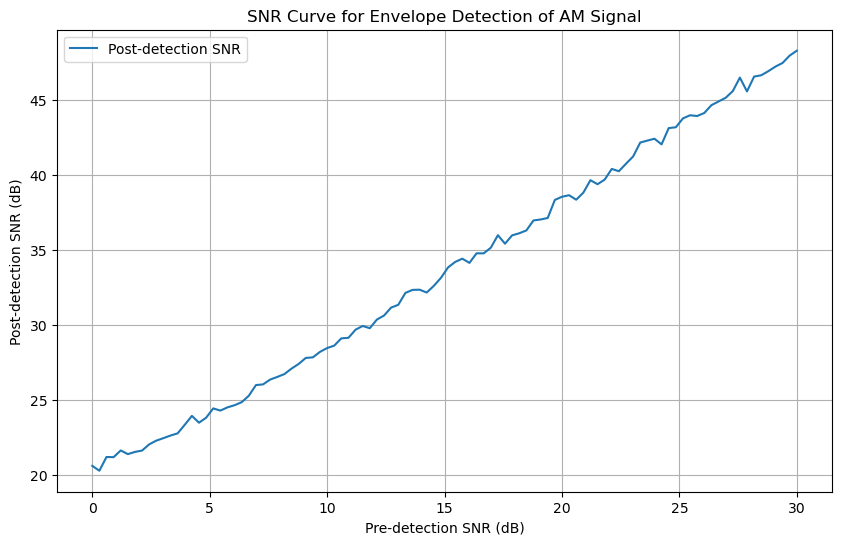

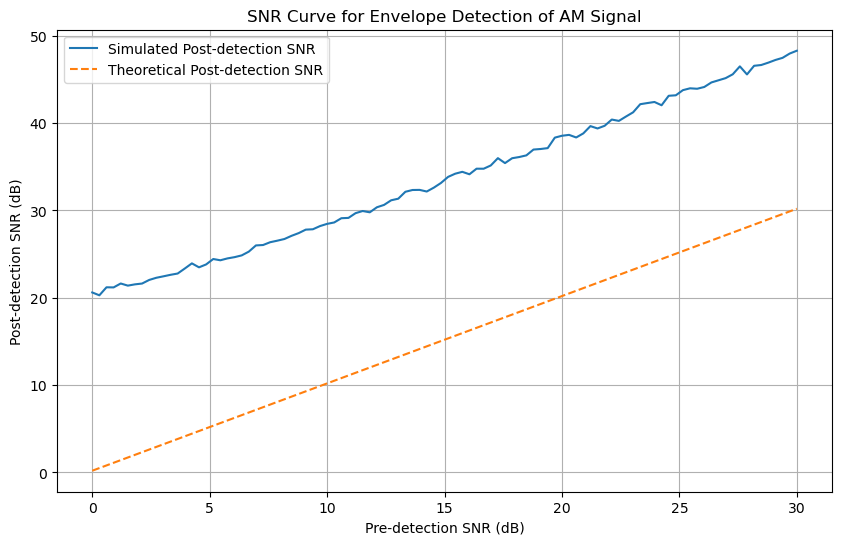

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Update the post-detection SNR calculation
def calculate_post_detection_snr(baseband, envelope, filtered_noise, fs, fm):
    # Calculate message signal power within the message bandwidth
    signal_power = np.mean((envelope - np.mean(envelope)) ** 2)
    
    # Calculate noise power within the message bandwidth
    # Assume the noise is band-limited to the message bandwidth
    noise_bandwidth = 2 * fm  # Double the message frequency for upper and lower sidebands
    noise_power = np.mean(filtered_noise ** 2) * (noise_bandwidth / fs)
    
    # Calculate SNR
    snr = signal_power / noise_power
    return 10 * np.log10(snr)

    
# Assuming the message signal power and noise power are known
message_power = np.mean(baseband ** 2)
noise_power = 0.01  # As defined in your simulation

# Create a range of pre-detection SNR values (in dB)
pre_detection_snr_db = np.linspace(0, 30, 100)
pre_detection_snr_linear = 10 ** (pre_detection_snr_db / 10)

# Placeholder for post-detection SNR values
post_detection_snr_linear = []



# Constants for SNR calculation
pre_detection_snr_db = np.linspace(0, 30, 100)  # Pre-detection SNR values in dB
post_detection_snr_db = []  # List to hold post-detection SNR values

for snr_db in pre_detection_snr_db:
    # Convert SNR from dB to linear scale
    snr_linear = 10 ** (snr_db / 10)
    
    # Adjust the noise power for the current SNR
    current_noise_power = message_power / snr_linear
    current_noise_std = np.sqrt(current_noise_power)
    
    # Generate new noise for this SNR
    noise = np.random.normal(0, current_noise_std, size=len(t))
    
    # Filter noise around the carrier frequency to simulate receiver filtering
    filtered_noise = bandpass_filter(noise, fc - fm, fc + fm, fs)
    
    # Add noise to the AM signal
    am_signal_noisy = am_signal + filtered_noise
    
    # Envelope detection
    analytic_signal = hilbert(am_signal_noisy)
    envelope = np.abs(analytic_signal)
    
    # Low-pass filter to get the message signal
    filtered_envelope = low_pass_filter(envelope, cutoff=fm, fs=fs, order=5)
    
    # Calculate post-detection SNR
    post_snr_db = calculate_post_detection_snr(baseband, filtered_envelope, filtered_noise, fs, fm)
    post_detection_snr_db.append(post_snr_db)

# Convert the post-detection SNR list to an array for plotting
post_detection_snr_db = np.array(post_detection_snr_db)

# Plot the SNR curve
plt.figure(figsize=(10, 6))
plt.plot(pre_detection_snr_db, post_detection_snr_db, label='Post-detection SNR')
plt.xlabel('Pre-detection SNR (dB)')
plt.ylabel('Post-detection SNR (dB)')
plt.title('SNR Curve for Envelope Detection of AM Signal')
plt.legend()
plt.grid(True)
plt.show()


# Theoretical SNR Improvement for an AM signal using an envelope detector
def theoretical_snr_improvement(modulation_index):
    """
    The theoretical SNR improvement for an envelope detector is given by:
    (1 + mod_index^2 / 2) for modulation indices less than or equal to 1
    """
    return 1 + (modulation_index**2 / 2)

# Calculate theoretical post-detection SNR values
theoretical_improvement = theoretical_snr_improvement(mod_index)
theoretical_post_snr_db = pre_detection_snr_db + 10 * np.log10(theoretical_improvement)

# ... [existing SNR calculation code]

# Plotting the SNR curves
plt.figure(figsize=(10, 6))
plt.plot(pre_detection_snr_db, post_detection_snr_db, label='Simulated Post-detection SNR')
plt.plot(pre_detection_snr_db, theoretical_post_snr_db, '--', label='Theoretical Post-detection SNR')
plt.xlabel('Pre-detection SNR (dB)')
plt.ylabel('Post-detection SNR (dB)')
plt.title('SNR Curve for Envelope Detection of AM Signal')
plt.legend()
plt.grid(True)
plt.show()
